In [1]:
import os
import pandas as pd
import numpy as np

# Load Data

In [42]:
file_dir = os.getenv("HOME") + '/saturi_lab_multi_nmt_low_resource/data/processed/translated_train_data_final.csv'
val_file = os.getenv('HOME') + '/saturi_lab_multi_nmt_low_resource/data/processed/validation_dataset_final.csv'

df = pd.read_csv(file_dir)
vdf = pd.read_csv(val_file)

In [43]:
vdf.head()

,Unnamed: 0,reg,text,text_corr,dial,pair,eng,eng_decon,dial2
0,0,cc,그날 근데 조금,그날 근데 조금,그날 근데 쫌,(쫌)/(조금),But that day is a little bit,But that day is a little bit,그날 근데 쫌
1,1,jd,DD09근데 이제 빨리 은퇴를 하지.,DD09 근데 이제 빨리 은퇴를 하지.,DD09근데 인자 빨리 은퇴를 하지.,(인자)/(이제),But he continued too actively,But he continued too actively,근데 인자 빨리 은퇴를 하지.
2,2,cc,근데 너무 적극적이어 가지고 어.,근데 너무 적극적 이어 가지고 어.,근데 너무 적극적이어 가주구 어.,(가주구)/(가지고),SD206 Yes it looks a little light,Yes it looks a little light,근데 너무 적극적이어 가주구 어.
3,3,jd,SD206예 그래요. 좀 좀 가볍게 보여요.,SD206 예 그래요. 좀 좀 가볍게 보여요.,SD206예 그러요. 좀 좀 가볍게 보여요.,(그러요.)/(그래요.),Where are you going,Where are you going,예 그러요. 좀 좀 가볍게 보여요.
4,4,kw,거기 있는 거기 나오는 어쨌든 그 음식들 그런 음식들을 다 한 개씩 가지고 와요.,거기 있는 거기 나오는 어쨌든 그 음식들 그런 음식들을 다 한 개씩 가지고 와요.,거기 있는 거기 나오는 어쨌든 그 음식들 그런 음석들을 다 한 개씩 가지고 와요.,(음석들을)/(음식들을),There Anyway bring all those foods one by one,There Anyway bring all those foods one by one,거기 있는 거기 나오는 어쨌든 그 음식들 그런 음석들을 다 한 개씩 가지고 와요.


In [44]:
# 필요한 컬럼만 포포함
train_df = df.loc[:,['reg','dial2','eng_decon']].copy()
train_df.columns = ['reg','dial','eng']

val_df = vdf.loc[:,['reg','dial2','eng_decon']].copy()
val_df.columns = ['reg','dial','eng']

In [45]:
train_df.head()

,reg,dial,eng
0,cc,적극성을 나도 뭐든 나서서 적극성 있게 이케,With activeness I took any activeness like this
1,cc,그니까 소심함이 쪼끔 강해서 그런 거지,So it is because you are timid
2,cc,그 소심함이 아니라 쫌 니가 적극적인 면도 어떤 면에서는 있을 거라고 생각해.,You are a little active about this It is neces...
3,cc,적극적으로 뭔가 딱딱 나서서 그래도 이케,Astigiously something hard comes up like this
4,cc,끊고 맺고 이렇게 해야지 적극성을 하면서 내 자존감도 높여봐와서 이케 하는데,You have to cut it off and make it like this t...


# Check for Null and repeated data

### Train

In [46]:
#na 값 확인
train_daf.isna().sum()

reg     0
dial    0
eng     0
dtype: int64

In [47]:
# 중복 확인
train_df.duplicated(subset='dial').sum() #전체 문장에서 47개 문장이 중복

47

In [48]:
train_df.loc[train_df.duplicated(subset='dial', keep=False)].sort_values(by='dial')[:30]

,reg,dial,eng
2421778,jj,영 했져,I did it like this
2081889,jj,영 했져,Thats how it worked
1045324,kw,진작에 혐의 인정 했으문 이딴 일 안 생겼어요.,So they bought me makgeolli because I made kimchi
1045321,kw,진작에 혐의 인정 했으문 이딴 일 안 생겼어요.,When did you start taking care of your sisters...
1049899,kw,2이 혼재 안될 거 같아서 온 집안이 도와주기로 했으이까,Anyway 6 the person who chose this
992882,kw,2이 혼재 안될 거 같아서 온 집안이 도와주기로 했으이까,Go down and the fruit tax
943926,kw,가껌 답답하거나 누그한테 뭐든지 말하구 싶으문 나 찾아.,Dont tear your notebook and write it beautifully
965002,kw,가껌 답답하거나 누그한테 뭐든지 말하구 싶으문 나 찾아.,It is pathetic when I see people who do not st...
1335939,kw,감기 걸릴 거 같으문 내일 일찍 벵원에 가봐.,If you feel like you are going to catch a cold...
1185288,kw,감기 걸릴 거 같으문 내일 일찍 벵원에 가봐.,If you feel like you are going to catch a cold...


In [85]:
# remove duplicated data
train_df.drop_duplicates(subset='dial', keep=False, inplace=True)

In [49]:
# Letve
check_idx = train_df[train_df.eng.str.contains('Letve')].index
train_df[train_df.eng.str.contains('Letve')]

,reg,dial,eng
5006,cc,연애를 쫌 길게 해 가지고 아 이 사람이 나한테 확신을 준다.,Letve a long relationship and this person give...
51089,cc,안해도 그냥 딱 그냥 그 상태만으로 코가 예뻐 가주고 나는 그게 쫌 부러운 거 같여.,Letve it down I told you to just get it but no...
66301,cc,그래 그거를 저기 갖다 놓고서는 운전을 해보라 그러니,Letve it over there and drive it
134897,cc,냅둬 어째 그래 야 너 빨리 먹어 빨리 먹어 엄마 챙피하니까 빨리 먹어 싫어.,Letve it alone why do not you eat it quickly q...
150907,cc,내비둬 내가 그냥 있다 개게 그랬더니 아니야 신경쓰지 마,Letve it down I said I would just do it but no...
...,...,...,...
2452142,jj,살짝 열어놔그냉,Letve it open a little bit
2459528,jj,그거 놩에,Letve that down
2471225,jj,기여 는 아들 가차운데 사난 막 좋더게 보언,Letve behind you you live close to your son so...
2473617,jj,내불주 게.,Letve it up let me do it let me do it let me d...


In [50]:
#replace
train_df['eng'] = train_df['eng'].str.replace('Letve','Let')

In [51]:
#check
train_df.iloc[check_idx]

,reg,dial,eng
5006,cc,연애를 쫌 길게 해 가지고 아 이 사람이 나한테 확신을 준다.,Let a long relationship and this person gives ...
51089,cc,안해도 그냥 딱 그냥 그 상태만으로 코가 예뻐 가주고 나는 그게 쫌 부러운 거 같여.,Let it down I told you to just get it but no d...
66301,cc,그래 그거를 저기 갖다 놓고서는 운전을 해보라 그러니,Let it over there and drive it
134897,cc,냅둬 어째 그래 야 너 빨리 먹어 빨리 먹어 엄마 챙피하니까 빨리 먹어 싫어.,Let it alone why do not you eat it quickly qui...
150907,cc,내비둬 내가 그냥 있다 개게 그랬더니 아니야 신경쓰지 마,Let it down I said I would just do it but no d...
...,...,...,...
2452142,jj,살짝 열어놔그냉,Let it open a little bit
2459528,jj,그거 놩에,Let that down
2471225,jj,기여 는 아들 가차운데 사난 막 좋더게 보언,Let behind you you live close to your son so i...
2473617,jj,내불주 게.,Let it up let me do it let me do it let me do ...


In [52]:
# validation dataset check
val_df.head()

,reg,dial,eng
0,cc,그날 근데 쫌,But that day is a little bit
1,jd,근데 인자 빨리 은퇴를 하지.,But he continued too actively
2,cc,근데 너무 적극적이어 가주구 어.,Yes it looks a little light
3,jd,예 그러요. 좀 좀 가볍게 보여요.,Where are you going
4,kw,거기 있는 거기 나오는 어쨌든 그 음식들 그런 음석들을 다 한 개씩 가지고 와요.,There Anyway bring all those foods one by one


In [53]:
val_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49616 entries, 0 to 49615
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reg     49616 non-null  object
 1   dial    49616 non-null  object
 2   eng     49608 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [58]:
#null count
val_df.isna().sum()

reg     0
dial    0
eng     8
dtype: int64

In [65]:
val_df.loc[val_df.eng.isna() == True] # there are some null data

,reg,dial,eng
6549,jd,그니까,NaN
10073,kw,수술하고 이십칠 일날 내려왔는데 이 아줌마가 어른도 좋다 애도 좋다 남녀노 노소...,NaN
14417,kw,그 선그라스가 예쁘드라고 언니,NaN
22786,jd,하 .,NaN
27956,jd,그랑께,NaN
41290,jd,인제 그,NaN
42837,jd,아이라거라,NaN
45698,jd,그면,NaN


In [67]:
#remove
remove_idx = val_df.loc[val_df.eng.isna() == True].index
val_df.drop(index=remove_idx, inplace=True)

In [68]:
# check 
val_df.loc[val_df.eng.isna() == True] 

,reg,dial,eng


In [70]:
# check for repeated data
val_df.duplicated(subset='dial').sum()

31

In [79]:
val_df.loc[ val_df.duplicated(subset='dial',keep=False)].sort_values(by='dial')

,reg,dial,eng
1768,jj,그니까,I know
35394,jd,그니까,Because of
30386,jd,그니까,Because it is
30063,jd,그니까,Because of
19884,jd,그니까,Because of
17246,jd,그니까,Because it is
13938,jd,그니까,Does Mr Seo have a class when he is socialized...
5346,kw,그니까.,Thats what I am saying
8307,jd,그니까.,My mom said that this is what she likes anyway
2000,jd,그러제.,Theres an issue so it is a little bit like tha...


In [87]:
val_df.drop_duplicates(subset='dial',keep=False,inplace=True)

In [88]:
import matplotlib.pyplot as plt

def double_bar(data, variable) :
    dt = data[variable].value_counts()
    dtp = data[variable].value_counts(normalize=True).multiply(100).round(2)

    plt.figure(figsize=(10,5))
    ax=plt.subplot(1,2,1)
    p = plt.bar(dt.index,dt)
    ax.bar_label(p, label_type = 'center', color='white', fontsize=8)

    ax=plt.subplot(1,2,2)
    p = plt.bar(dtp.index,dtp)
    ax.bar_label(p, label_type = 'center', color='white', fontsize=8)

    plt.show()


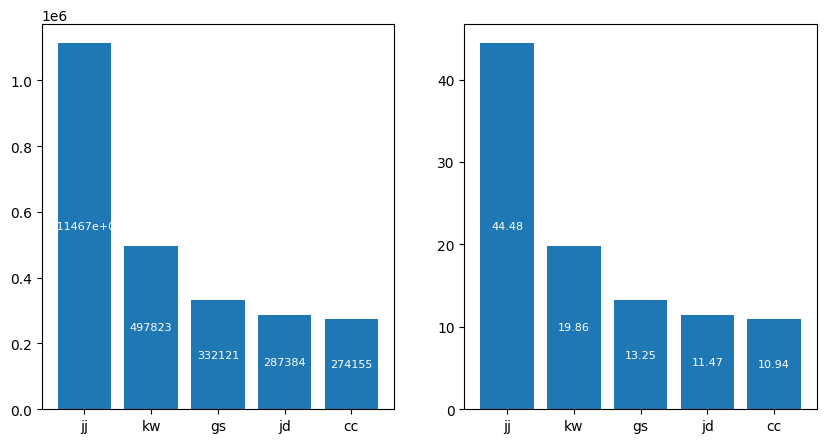

In [89]:
#train data distribution by region
double_bar(train_df,'reg')

제주도 데이터가 44.48%(114만)로 상대적으로 가장 많은 것으로 나타남. 데이터 imbalance가 존재.

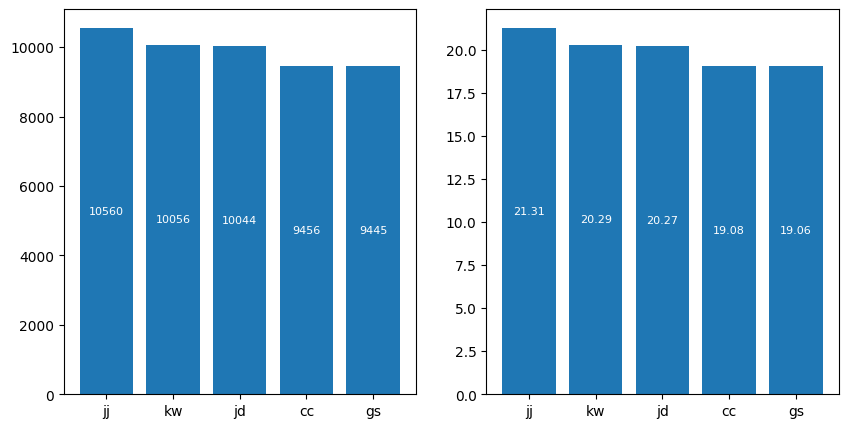

In [90]:
#validation data distribution by region
double_bar(val_df,'reg')

validation data는 균형이 잡혀있는 것으로 나나탐

## Sequence length

In [91]:
# character
train_df['c_len_dial'] = train_df['dial'].apply(lambda x : len(x))
train_df['c_len_eng'] = train_df['eng'].apply(lambda x : len(x))
print(train_df['c_len_dial'].mean())
print(train_df['c_len_eng'].mean())

25.433497648985377
52.896116436672635


In [93]:
# word
train_df['w_len_dial'] = train_df['dial'].apply(lambda x : len(x.split()))
train_df['w_len_eng'] = train_df['eng'].apply(lambda x : len(x.split()))
print(train_df['w_len_dial'].mean())
print(train_df['w_len_eng'].mean())

7.404139094516214
11.246566449281607


In [83]:
# token

In [84]:
# most frequent token

In [ ]:
# most frequent word